In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.10.1
sys.version_info(major=3, minor=8, micro=17, releaselevel='final', serial=0)
matplotlib 3.7.2
numpy 1.24.4
pandas 2.0.3
sklearn 1.3.0
tensorflow 2.10.1
keras.api._v2.keras 2.10.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)



In [4]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(10):
    model.add(keras.layers.Dense(50,activation='relu'))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])

In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 50)                2

In [6]:
len(model.layers)


22

In [7]:
logdir='./dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file=os.path.join(logdir,'fashion_mnist_model.h5')
callbacks=[
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),

]

history=model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_valid_scaled,y_valid),callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 42s 21ms/step - loss: 1.5963 - accuracy: 0.4855 - val_loss: 0.8647 - val_accuracy: 0.7232

In [8]:
history.history


{'loss': [1.596266746520996,
  0.9467188715934753,
  0.8199460506439209,
  0.746794581413269,
  0.6982440948486328,
  0.6574792861938477,
  0.6314348578453064,
  0.6038296818733215,
  0.58527010679245,
  0.5685960054397583,
  0.5485624670982361,
  0.5453392267227173,
  0.5295689105987549,
  0.5264233946800232,
  0.5140784382820129,
  0.49860769510269165,
  0.4955849051475525,
  0.4906129837036133,
  0.477916419506073,
  0.4771522283554077,
  0.4667242765426636,
  0.4678487777709961,
  0.45438745617866516,
  0.45454299449920654,
  0.44498035311698914,
  0.4447495639324188,
  0.4381490647792816,
  0.435372918844223,
  0.42806175351142883,
  0.43131986260414124,
  0.4205375015735626,
  0.4177911877632141,
  0.41792550683021545,
  0.41201916337013245,
  0.40954703092575073,
  0.4041556715965271,
  0.404321551322937,
  0.3997739553451538,
  0.3986877202987671,
  0.39406147599220276,
  0.39527371525764465,
  0.3900395631790161,
  0.3877744674682617,
  0.38433438539505005,
  0.385325789451599

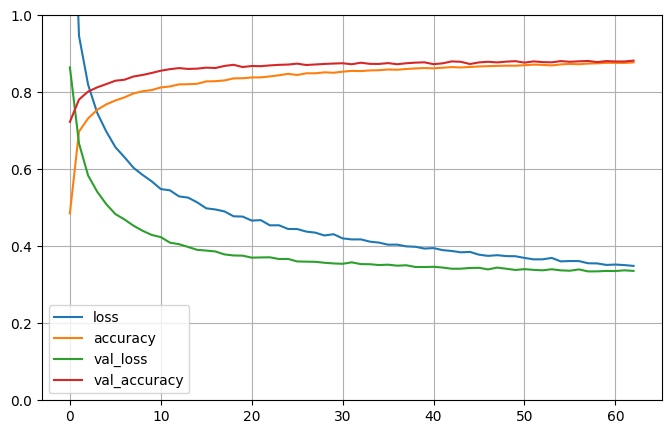

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3690996468067169, 0.8695999979972839]